In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer # tfidf
from sklearn.metrics.pairwise import linear_kernel # 코사인 유사도
from konlpy.tag import Okt # 토큰화
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from soynlp.normalizer import emoticon_normalize, repeat_normalize
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers
import keras.utils
import sklearn.metrics as metrics
from konlpy.tag import Komoran
# from konlpy.tag import Mecab
# from eunjeon import Mecab

In [2]:
data = pd.read_csv("data/train.hate.csv")
data

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,hate
...,...,...
7891,힘내세요~ 응원합니다!!,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,none


In [3]:
okt=Okt()

In [47]:
# df = pd.read_csv("stop_words.csv",header=None,encoding='cp949')
# stopwords = df[1].tolist()

In [146]:
# df = pd.read_csv("data/korean_stopwords.txt",header=None)
# stopwords = df[0].tolist()

In [191]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [237]:
# okt
token=[]
for i in data['comments']:
    hangul=re.compile('[^ ㄱ-ㅎㅏ-ㅣ가-힣]+')
    i = hangul.sub('', i) 
    i=repeat_normalize(i,num_repeats=3) # 반복되는 문자 정제
    temp = okt.morphs(i,stem=True,norm=True)
    temp= [word for word in temp if not word in stopwords]
    token.append(temp)


In [193]:
# # Komoran
# komoran = Komoran()
# token=[]
# for i in data['comments']:
#     hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
#     i = hangul.sub('', i) 
#     i=repeat_normalize(i,num_repeats=3) # 반복되는 문자 정제
#     temp = komoran.morphs(i)
#     temp= [word for word in temp if not word in stopwords]
#     token.append(temp)

In [194]:
# # Mecab
# mecab = Mecab(dicpath='C;\mecab\mecab-ko-dic')
# token=[]
# for i in data['comments']:
#     hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
#     i = hangul.sub('', i) 
#     i=repeat_normalize(i,num_repeats=3) # 반복되는 문자 정제
#     temp = mecab.morphs(i)
#     temp= [word for word in temp if not word in stopwords]
#     token.append(temp)

In [239]:
token

[['현재',
  '호텔',
  '주인',
  '심정',
  '아',
  '난',
  '마른하늘',
  '날벼락',
  '맞다',
  '호텔',
  '망하다',
  '생기다',
  '누',
  '군',
  '계속',
  '추모',
  '받다'],
 ['한국',
  '적',
  '인',
  '미인',
  '대표',
  '적',
  '인',
  '분',
  '너무나',
  '곱',
  '고',
  '아름답다',
  '모습',
  '그',
  '모습',
  '뒤',
  '슬픔',
  '을',
  '미처',
  '알다',
  'ㅠ'],
 ['못',
  '되다',
  '넘다',
  '들다',
  '남',
  '고통',
  '을',
  '즐기다',
  '넘다',
  '들이다',
  '젠',
  '마땅하다',
  '처벌',
  '을',
  '받다',
  '그',
  '래야',
  '공정하다',
  '사회',
  '지',
  '심다',
  '거두다'],
 ['화', '어설프다', '화', '지나다', '갈수록', '너무', '재밌다'],
 ['사람',
  '얼굴',
  '손톱',
  '긁다',
  '인격',
  '살해',
  '이고',
  '동영상',
  '몰카',
  '냐',
  '메걸',
  '리안',
  '생각',
  '없다'],
 ['진짜', '이승기', '랑', '비교', '되다'],
 ['년안',
  '남녀',
  '간',
  '성',
  '전쟁',
  '한번',
  '크게',
  '치룬',
  '후',
  '일부다처제',
  '여성',
  '정치',
  '참여',
  '금지',
  '여성',
  '투표',
  '권',
  '삭제',
  '세계',
  '공통',
  '문화',
  '로',
  '자리',
  '잡다',
  '암탉',
  '너무',
  '울다',
  '댐'],
 ['년뒤', '윤서인', '분명하다', '재', '평가', '되다', '임', '말다', '틀리다', '없다'],
 ['년', '만에', '재미', '느끼다', '프로', '이다', '왜', 

In [240]:
token = pd.Series(token)

In [241]:
data['token'] = token

In [242]:
data['label'].value_counts()

none         3486
offensive    2499
hate         1911
Name: label, dtype: int64

In [243]:
df = data[['label','token']]

In [344]:
train, test = train_test_split(df, test_size=0.3)

In [345]:
print(train.shape)
print(test.shape)

(5527, 2)
(2369, 2)


In [346]:
xTrain = train['token'].tolist()
xTest = test['token'].tolist()

In [347]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xTrain)

In [348]:
print(tokenizer.word_index)

{'보다': 1, '아니다': 2, '을': 3, '있다': 4, '없다': 5, '다': 6, '같다': 7, 'ㅋㅋㅋ': 8, '되다': 9, '안': 10, '좋다': 11, '사람': 12, '왜': 13, '여자': 14, '못': 15, '만': 16, '나오다': 17, '이다': 18, '로': 19, '진짜': 20, '에서': 21, '고': 22, '나': 23, '너무': 24, 'ㅋㅋ': 25, '그렇다': 26, '네': 27, '하고': 28, '들다': 29, '남자': 30, '이쁘다': 31, '아': 32, '가다': 33, '않다': 34, '그': 35, '많다': 36, '뭐': 37, '더': 38, '때': 39, '알다': 40, '지': 41, '씨': 42, '게': 43, '저': 44, '인데': 45, '애': 46, '인': 47, '그냥': 48, '것': 49, '니': 50, '먹다': 51, '거': 52, '자다': 53, '결혼': 54, '말': 55, 'ㅋ': 56, '라': 57, '연기': 58, '얼굴': 59, '모르다': 60, '돈': 61, '드라마': 62, '면': 63, '랑': 64, '기사': 65, '생각': 66, '오다': 67, '년': 68, '한테': 69, '받다': 70, '연예인': 71, '넘다': 72, '적': 73, '까지': 74, '살다': 75, '지다': 76, '차다': 77, '방송': 78, '이나': 79, '내': 80, '야': 81, '생기다': 82, '냐': 83, '요': 84, '서': 85, '이제': 86, '예쁘다': 87, '보고': 88, '또': 89, '맞다': 90, '^^': 91, 'ㅠㅠ': 92, '하': 93, '치다': 94, '댓글': 95, '부터': 96, '님': 97, '개': 98, '난': 99, '나다': 100, '돼다': 101, '안되다': 102, '근데': 103, '무슨':

In [349]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 10110
등장 빈도가 1번 이하인 희귀 단어의 수: 5171
단어 집합에서 희귀 단어의 비율: 51.147378832838776
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.813066602199928


In [350]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4941


In [351]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(xTrain)
xTrain = tokenizer.texts_to_sequences(xTrain)
xTest = tokenizer.texts_to_sequences(xTest)

In [352]:
xTrain = np.array(xTrain)

In [353]:
xTest = np.array(xTest)

In [354]:
xTrain.shape

(5527,)

In [355]:
xTest.shape

(2369,)

In [356]:
yTrain = np.array(train['label'])
yTest = np.array(test['label'])

In [357]:
yTrain.shape

(5527,)

In [358]:
yTest.shape

(2369,)

리뷰의 최대 길이 : 49
리뷰의 평균 길이 : 11.974669802786321


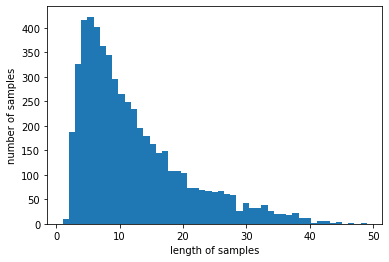

In [359]:
print('리뷰의 최대 길이 :',max(len(l) for l in xTrain))
print('리뷰의 평균 길이 :',sum(map(len, xTrain))/len(xTrain))
plt.hist([len(s) for s in xTrain], bins=49)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [360]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [361]:
max_len = 30
below_threshold_len(max_len, xTrain)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 95.42247150352814


In [362]:
xTrain = pad_sequences(xTrain, maxlen = max_len)
xTest = pad_sequences(xTest, maxlen = max_len)

In [363]:
print(len(xTrain))
print(len(yTrain))

5527
5527


In [364]:
xTrain

array([[   0,    0,    0, ...,  270,  162,  113],
       [   0,    0,    0, ...,  220,   73,   12],
       [   0,    0,    0, ...,   74,  200,  605],
       ...,
       [   0,    0,    0, ...,    6,  990, 1282],
       [   0,    0,    0, ...,  276,   38,  112],
       [   0,    0,    0, ...,    8,    1,   19]])

In [365]:
def vs(seq):
    res = np.zeros((len(seq),len(yTrain))) 
    for i,sequence in enumerate(seq):
        res[i, sequence] = 1
                 
    return res

xTrain = vs(xTrain)
xTest = vs(xTest)

In [366]:
for i in range(len(yTrain)):
    if yTrain[i] == 'offensive':
        yTrain[i] = float(1)
      
    elif yTrain[i] == 'hate':
        yTrain[i] = float(2)
  
    elif yTrain[i] == 'none':
        yTrain[i] = float(0)
      
    else:
        pass
  

In [367]:
for i in range(len(yTest)):
    if yTest[i] == 'hate':
        yTest[i] = float(2)
      
    elif yTest[i] == 'offensive':
        yTest[i] = float(1)
      
    elif yTest[i] == 'none':
        yTest[i] = float(0)
      
    else:
        pass


In [368]:
yTrain = yTrain.astype(float)
yTrain

array([0., 0., 0., ..., 1., 0., 2.])

In [369]:
yTrain = keras.utils.to_categorical(yTrain, 3)
yTest = keras.utils.to_categorical(yTest, 3)

In [370]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [374]:
model = Sequential()
model.add(Embedding(len(xTrain),max_len))
model.add(LSTM(16))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 30)          165810    
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3008      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 387       
Total params: 171,381
Trainable params: 171,381
Non-trainable params: 0
_________________________________________________________________


In [316]:
model = Sequential()
model.add(Dense(512,input_dim = len(xTrain),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               2830336   
_________________________________________________________________
dense_29 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_30 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 195       
Total params: 2,978,307
Trainable params: 2,978,307
Non-trainable params: 0
_________________________________________________________________


In [372]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
adam = optimizers.Adam(lr = 0.00001)
sgd = optimizers.SGD(lr=0.1,decay=1e-6,momentum=0.9, nesterov = True)

In [373]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer = adam)
history = model.fit(xTrain, yTrain, epochs=10000, callbacks=[es, mc], batch_size=100, validation_split=0.2)

Epoch 1/10000
45/45 [==============================] - ETA: 0s - loss: 1.0988 - acc: 0.3056
Epoch 00001: val_acc improved from -inf to 0.42224, saving model to best_model.h5
45/45 [==============================] - 320s 7s/step - loss: 1.0988 - acc: 0.3056 - val_loss: 1.0983 - val_acc: 0.4222
Epoch 2/10000
45/45 [==============================] - ETA: 0s - loss: 1.0977 - acc: 0.4454 
Epoch 00002: val_acc did not improve from 0.42224
45/45 [==============================] - 478s 11s/step - loss: 1.0977 - acc: 0.4454 - val_loss: 1.0974 - val_acc: 0.4222
Epoch 3/10000
45/45 [==============================] - ETA: 0s - loss: 1.0968 - acc: 0.4454 
Epoch 00003: val_acc did not improve from 0.42224
45/45 [==============================] - 495s 11s/step - loss: 1.0968 - acc: 0.4454 - val_loss: 1.0966 - val_acc: 0.4222
Epoch 4/10000
45/45 [==============================] - ETA: 0s - loss: 1.0959 - acc: 0.4454 

KeyboardInterrupt: 

In [ ]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(xTest, yTest)[1]))

In [ ]:
pred = loaded_model.predict(xTest)
pred

In [ ]:
yTest_decode = []
for i in range(len(pred)):
    val = yTest[i].argmax()
    yTest_decode.append(val)
len(yTest_decode)

In [ ]:
pred_decode = []
for i in range(len(yTest)):
    val = pred[i].argmax()
    pred_decode.append(val)
len(pred_decode)

In [ ]:
print('f1 : ',metrics.f1_score(yTest_decode, pred_decode, average='macro'))
print('accuracy', metrics.accuracy_score(yTest_decode, pred_decode))

In [ ]:
# okt
# f1: 0.5471
# acc: 0.5753

In [91]:
# komoran
# f1: 0.5223
# acc: 0.5547

In [ ]:
# okt + LSTM(16) 
# f1:  0.5307
# accuracy: 0.5618